In [85]:
import numpy as np 
import os
import sys
#import scipy.io as sio
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVR
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


### 1. Se pide: (regression)

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- SVR

In [86]:
import pandas as pd

df = pd.read_csv("../data/USA_Housing.csv")
df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     23086.800503  1.059034e+06   
1                             3.09     40173.072174  1.505891e+06   
2                             5.13     36882.159400  1.058988e+06   
3                             3.26     34310.242831  1.260617e+06   
4                             4.23     26354.109472  6.309435e+05   
...                            ...              ...           ...   
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\r\nLaurabury, NE 37...  
1     188 Johnson Views Suite 079\r\nLake Kathleen, ...  
2     9127 Elizabeth Stravenue\r\nDanieltown, WI 064...  
3                           USS Barnett\r\nFPO AP 44820  
4                          USNS Raymond\r\nFPO AE 09386  
...                                                 ...  
4995                 USNS Williams\r\nFPO AP 30153-7653  
4996            PSC 9258, Box 8489\r\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\r\nJoshualand, VA ...  
4998                        USS Wallace\r\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\r\nEast Holly, NV...  

[5000 rows x 7 columns]

In [87]:
def svr_func(column):

    target = df["Price"].apply(round)
    # reshape dataframe column
    X = np.array(column).reshape(-1,1)
    target = np.array(target).reshape(-1,1)

    # split data into groups
    X_train, X_test, y_train, y_test = train_test_split(X, target.ravel(), test_size=0.20, random_state=42)
    # SVR
    svr = SVR(kernel="rbf", C=100, gamma=.1) 
    model = svr.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    # plot the results
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='red') 

    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='green')
    print("Score:", svr.score(X_train, y_train))

Score: 0.00043426450675210226


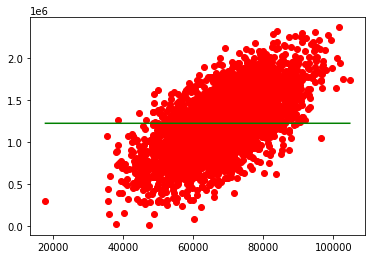

In [88]:
svr_func(df["Avg. Area Income"])

Score: 0.0380649717106879


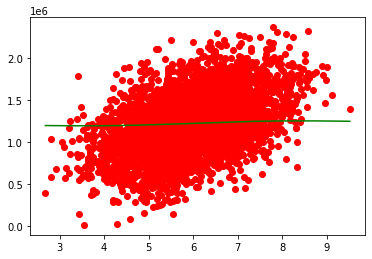

In [89]:
svr_func(df["Avg. Area House Age"])

Score: 0.020983209413094395


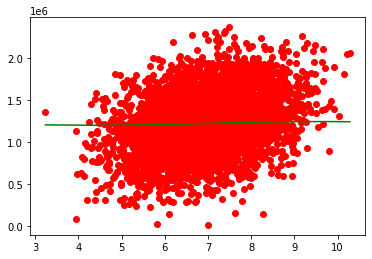

In [90]:
svr_func(df["Avg. Area Number of Rooms"])

Score: 0.007364930678045556


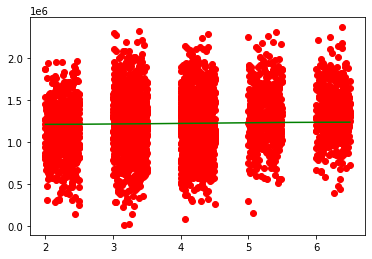

In [91]:
svr_func(df["Avg. Area Number of Bedrooms"])

Score: 0.00041267534479461077


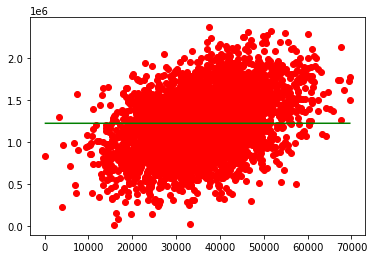

In [92]:
svr_func(df["Area Population"])

### 2. Se pide: (classification)

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

-------------------------- 

ACLARACIÓN del apartado 2 del ejercicio 2:

- En el punto 3, se espera que tu X sea una sola columna e y también, 'Avg. Area Number of Bedrooms'.

- En el punto 4, se espera que tu X sean todas las columnas que cumplen con las características especificadas y la columna 'Avg. Area Number of Bedrooms'

In [93]:
# Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

In [94]:
def round(n):
    if n - math.floor(n) <= 0.5:
        return math.floor(n)
    else:
        return math.ceil(n)

In [95]:
target = df["Avg. Area Number of Bedrooms"].apply(round)

In [96]:
# Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

In [103]:
def svc_func(column):

    X = np.array(column).reshape(-1,1)

    #standarizacion
    scaler = StandardScaler()
    scaler.fit(X)
    X_normalized = scaler.transform(X)

    # split data into groups
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, target, test_size=0.20, random_state=42)

    #SVC
    svc = svm.SVC(kernel= "linear", C=100)
    model = svc.fit(X_train, y_train.ravel())

    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    y_pred = model.predict(X_train_to_show)
    # plot the results
    plt.scatter(X_train_to_show, y_train_to_show, color='red')

    plt.plot(X_train_to_show, y_pred, color='green')
    print("Score:", svc.score(X_train, y_train))

Score: 0.3005


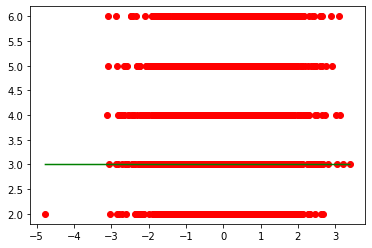

In [104]:
svc_func(df["Avg. Area Income"])

Score: 0.3005


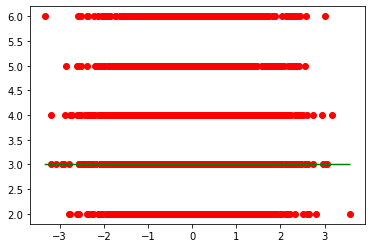

In [105]:
svc_func(df["Avg. Area House Age"])

Score: 0.3005


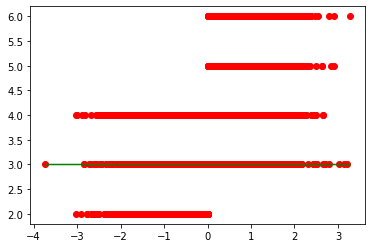

In [106]:
svc_func(df["Avg. Area Number of Rooms"])

Score: 0.3005


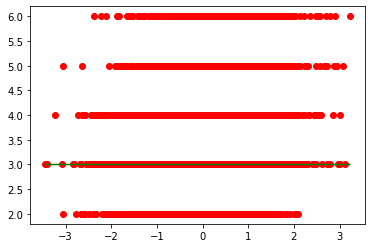

In [107]:
svc_func(df["Price"])

Score: 0.3005


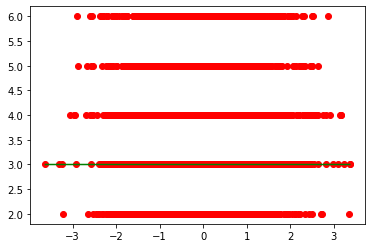

In [108]:
svc_func(df["Area Population"])

In [109]:
# Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué?

In [110]:
df.drop(["Address", "Avg. Area Number of Bedrooms"], axis=1, inplace=True)

In [111]:
df1 =df.to_numpy()

In [112]:
target = np.array(target).reshape(-1,1)
target.shape

(5000, 1)

In [113]:
# split data into groups
X_train, X_test, y_train, y_test = train_test_split(df1, target, test_size=0.20, random_state=42)
#SVC
svc = svm.SVC(C=1000)
model = svc.fit(X_train, y_train)

print("Score:", svc.score(X_train, y_train))

C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Score: 0.3045


In [ ]:
# ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target?

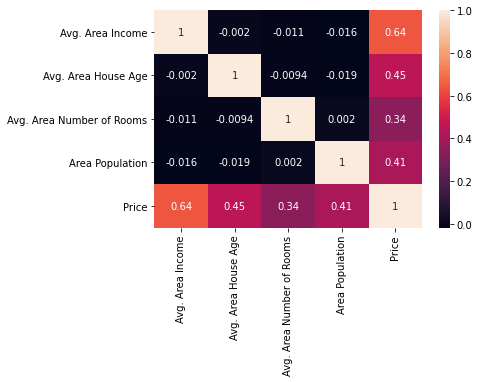

In [114]:
sns.heatmap(df.corr(), annot = True)
plt.show()

# Price es la variable que tiene mejor correlación con avg. area number of beedrooms